In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
oliv = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Aman kumar\scikit_learn_data


In [5]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [6]:
oliv['data'].shape

(400, 4096)

In [8]:
oliv['images'].shape

(400, 64, 64)

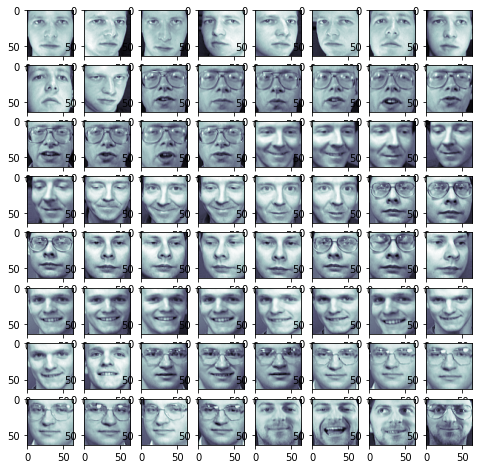

In [13]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)

plt.show()

In [14]:
x = oliv.data
y = oliv.target

In [15]:
pca = PCA()
pca.fit(x)

PCA()

In [17]:
pca.components_.shape

(400, 4096)

In [19]:
pca.explained_variance_.shape

(400,)

In [21]:
total = sum(pca.explained_variance_)
k = 0
currSum = 0
while currSum / total < 0.95:
    currSum += pca.explained_variance_[k]
    k = k + 1
    
k

123

In [29]:
pca = PCA(n_components= k, whiten = True)

transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [30]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [31]:
x_approx_images = x_approx.reshape((400, 64, 64))

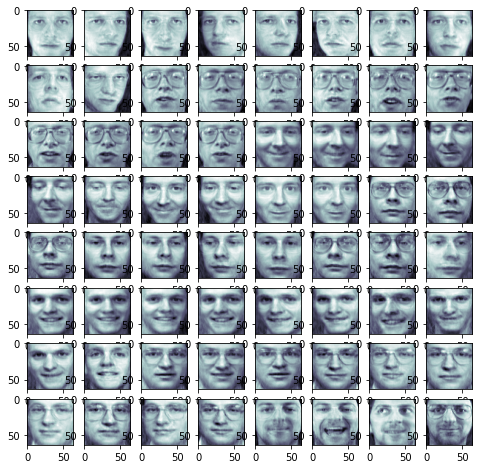

In [32]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(x_approx_images[i], cmap = plt.cm.bone)

plt.show()

In [35]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

In [36]:
eigenfaces = eigenv.reshape((123, 64, 64))

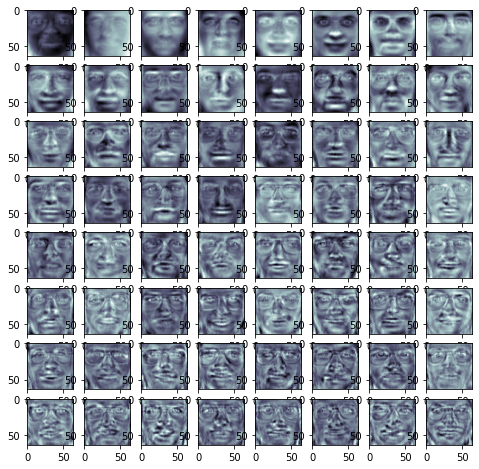

In [37]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(eigenfaces[i], cmap = plt.cm.bone)

plt.show()

### Here each component seems to make something similar to a face , that's actually we call it eigenfaces because they look like faces. In case of Images this eigen vector -> we call them eigenfaces